In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = datasets.KMNIST(root="data",
                             download=True,
                             train=True,
                             transform=ToTensor(),
                             target_transform=None)
test_data = datasets.KMNIST(root="data",
                             download=True,
                             train=False,
                             transform=ToTensor(),
                             target_transform=None)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
class_names = train_data.classes
class_names

['o', 'ki', 'su', 'tsu', 'na', 'ha', 'ma', 'ya', 're', 'wo']

In [5]:
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.4627, 1.0000, 1.0000, 0.4863, 0.0039,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1412, 0.9333, 1.0000, 0.5725, 0.0078, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0471, 0.7961, 1.0000, 0.8627, 0.0549, 0.0000, 0.0000,
           0.0000, 0.0431, 0.5176, 0.3725, 0.7333, 0.3725, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.5843, 1.0000, 0.9843, 0.2588, 0.0000, 0.0000, 0.0000,
           0.0275, 0.6588, 0.5333, 0.0392, 

In [6]:
image.shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 're')

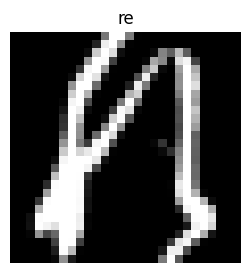

In [7]:
plt.figure(figsize=(3,3))
plt.imshow(image.squeeze(),cmap="gray")
plt.axis(False)
plt.title(class_names[label])

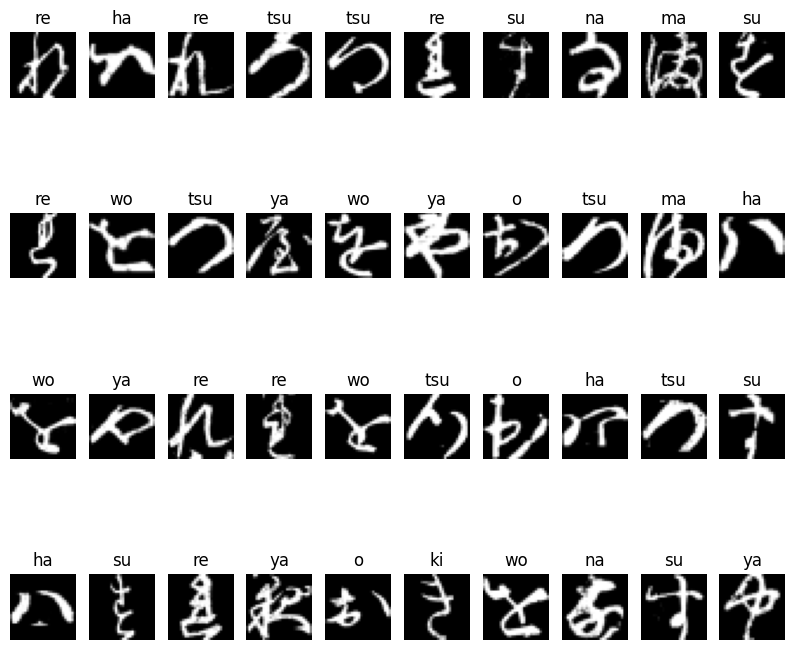

In [8]:
def imagePlotter(train_data):
    fig =plt.figure(figsize=(10,9))
    rows=4
    cols=10
    for i in range(1,rows*cols+1):
        random_idx = torch.randint(0,len(train_data),size=[1]).item()
        img , label = train_data[random_idx]
        plt.subplot(rows,cols,i)
        plt.imshow(img.squeeze(),cmap="gray")
        plt.axis(False)
        plt.title(class_names[label])

imagePlotter(train_data)

In [9]:
# type(train_data)
BATCH_SIZE=32
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              )

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f" Test dataloader : {train_dataloader} | Test dataloader: {test_dataloader}")
print(f"Shape of train dataloader:{len(train_dataloader)} || test dataloader :{len(test_dataloader)}")

 Test dataloader : <torch.utils.data.dataloader.DataLoader object at 0x0000027EEAE44170> | Test dataloader: <torch.utils.data.dataloader.DataLoader object at 0x0000027EEBED8B90>
Shape of train dataloader:1875 || test dataloader :313


In [10]:
train_features_batch , train_label_batch = next(iter(train_dataloader))
train_features_batch.shape , train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

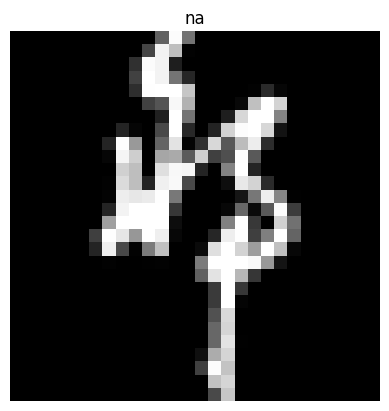

In [11]:
plt.imshow(train_features_batch[0].squeeze(), cmap="gray")
plt.title(class_names[train_label_batch[0]])
plt.axis("off")

In [17]:
# class KMNISTMODEL(nn.Module):
#     def __init__(self , output_features):
#         super().__init__()
#         self.layer_stack=nn.Sequential(
#             nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2),
#             nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3),
#             nn.ReLU(),
#             nn.Flatten(),
#             nn.Linear(in_features=32*11*11,out_features=40),
#             nn.ReLU(),
#             nn.Linear(in_features=40,out_features=output_features)
#         )

#     def forward(self ,x):
#         return self.layer_stack(x)
    
# model_0 = KMNISTMODEL(10)
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.dropout = nn.Dropout(0.05)
        self.pipeline = nn.Sequential(
            # in channels is 1, because the input is grayscale
            nn.Conv2d(in_channels=1, out_channels=10,
                      kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=10,
                      kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=10,
                      kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=5,
                      kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            # dropout to introduce randomness and reduce overfitting
            self.dropout,
            # reduce and flat the tensor before applying the flat layers
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(500, 50),
            nn.ReLU(),
            self.dropout,
            nn.Linear(50, 50),
            nn.ReLU(),
            self.dropout,
            nn.Linear(50, 10),
            nn.ReLU(),
            self.dropout,
            nn.Linear(10, 10),
            nn.ReLU(),
            self.dropout,
            nn.Linear(10, 10),
        )

    def forward(self, x):
        return self.pipeline(x)


model_0 = CNNClassifier()
model_0

CNNClassifier(
  (dropout): Dropout(p=0.05, inplace=False)
  (pipeline): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(10, 10, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(10, 5, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Dropout(p=0.05, inplace=False)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=500, out_features=50, bias=True)
    (12): ReLU()
    (13): Dropout(p=0.05, inplace=False)
    (14): Linear(in_features=50, out_features=50, bias=True)
    (15): ReLU()
    (16): Dropout(p=0.05, inplace=False)
    (17): Linear(in_features=50, out_features=10, bias=True)
    (18): ReLU()
    (19): Dropout(p=0.05, inplace=False)
    (20): Linear(in_features

In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

In [19]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [20]:
epochs =10
train_loss=0
for epoch in range(epochs):
    for X,y in train_dataloader:
        model_0.train()
        train_pred = model_0(X)
        loss = loss_fn(train_pred,y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /=len(train_dataloader)

    model_0.eval()
    test_acc=0
    with torch.inference_mode():
        for X,y in test_dataloader:
            y_pred = model_0(X)
            test_acc+= accuracy_fn(y,y_pred.argmax(dim=1))
        test_acc/=len(test_dataloader)
    print(f"train loss :{train_loss}")
    print(f"test accuracy:{test_acc}")

train loss :0.8705336451530457
test accuracy:78.61421725239616
train loss :0.3532574474811554
test accuracy:86.32188498402556
train loss :0.27041852474212646
test accuracy:88.30870607028754
train loss :0.22912493348121643
test accuracy:88.99760383386581
train loss :0.2051539421081543
test accuracy:90.60503194888179
train loss :0.1905316263437271
test accuracy:89.97603833865814
train loss :0.17662061750888824
test accuracy:90.96445686900958
train loss :0.16215255856513977
test accuracy:91.16413738019169
train loss :0.15513761341571808
test accuracy:92.38218849840256
train loss :0.1478460282087326
test accuracy:91.78314696485623
